# Logistic Regression Algorithm

Logistic Regression is a supervised machine learning algorithm used for binary classification. It models the probability that a given input belongs to one of two classes (0 or 1). The algorithm uses the logistic (sigmoid) function to transform a linear combination of input features into a probability value between 0 and 1. It learns the optimal parameters (coefficients) by minimizing a cost function, typically the logistic loss or cross-entropy loss.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3

### Code Explanation:

* Initialization: The LogisticRegression class is initialized with parameters for learning rate and the number of iterations for gradient descent.

* Sigmoid Function: The sigmoid function implements the sigmoid activation function.

* Cost Function: The cost_function computes the logistic loss, which measures the error between predicted probabilities and actual labels.

* Fit Method: The fit method trains the logistic regression model using gradient descent. It iteratively updates the model's parameters (self.theta) to minimize the cost function while storing the cost history.

* Predict Method: The predict method predicts class labels based on the learned model's parameters.

* Plot Decision Boundary: The plot_decision_boundary method visualizes the decision boundary and the cost function history. It plots the data points, the decision boundary, and the cost function's convergence.

* Example Usage: The example usage generates synthetic data, creates and trains a logistic regression model, makes predictions on new data, and then plots the decision boundary and cost function history.

In [11]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.cost_history = []

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient
            cost = self.cost_function(h, y)
            self.cost_history.append(cost)

    def predict(self, X):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        return (h >= 0.5).astype(int)

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(12, 6))

        # Plot the data points
        plt.subplot(121)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title("Decision Boundary")
        plt.grid(True)

        # Plot the decision boundary
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
        Z = self.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.8)

        # Plot the cost function history
        plt.subplot(122)
        plt.plot(range(self.num_iterations), self.cost_history)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Cost Function History")

        plt.show()


Predictions: [1 0]


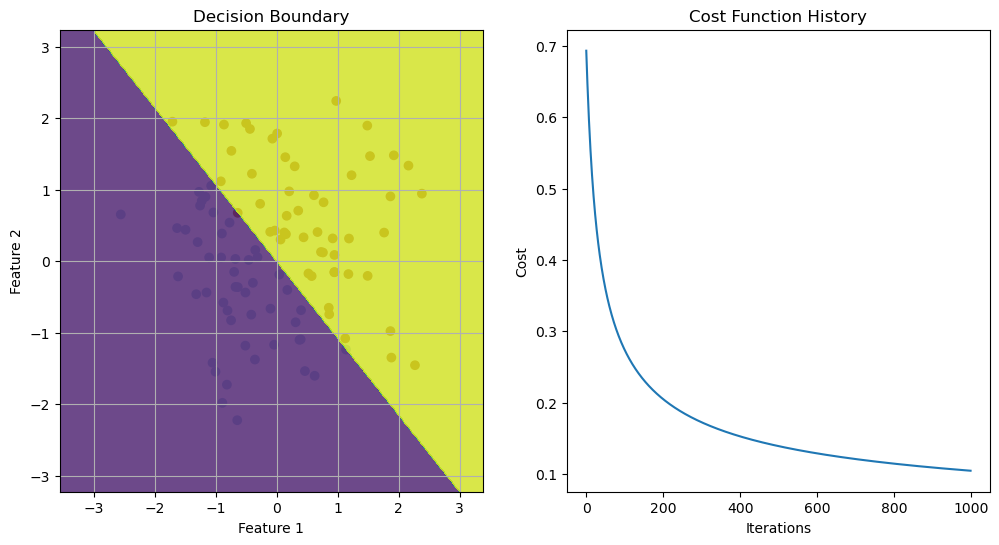

In [12]:
# Example usage:
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Create and train the logistic regression model
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X, y)

    # Make predictions on new data
    new_data = np.array([[1.0, 1.0], [-1.0, -1.0]])
    predictions = model.predict(new_data)

    print("Predictions:", predictions)

    # Plot decision boundary and cost function history
    model.plot_decision_boundary(X, y)


# Conclusion

Logistic Regression is a foundational algorithm in machine learning and serves as a building block for more complex models. It is particularly useful for binary classification tasks and has applications in various domains, including medical diagnosis, spam detection, and credit risk assessment. Understanding Logistic Regression and its implementation from scratch is essential for gaining a strong foundation in machine learning and data science.